In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# Q1

In [2]:
marks=np.array([6,7,5,7,7,8,7,6,9,7,4,10,6,8,8,9,5,6,4,8])
marks.mean()

6.85

In [3]:
print(f'median: {np.median(marks)}, mode: {stats.mode(marks)[0]}, standard deviation: {marks.std()}')

median: 7.0, mode: [7], standard deviation: 1.5898113095584647


# Q2

In [4]:
motorists=np.array([28,122,217,130,120,86,80,90,140,120,70,40,145,113,90,68,174,194,170,100,75,104,97,75,123,100,75,107,97,75,123,100,89,120,109])

In [5]:
print(f'mean: {motorists.mean()}, median: {np.median(motorists)}, mode: {stats.mode(motorists)[0]}, standard deviation: {motorists.std()}')

mean: 107.6, median: 100.0, mode: [75], standard deviation: 38.76832285697767


# Q3

In [6]:
gym=pd.DataFrame({'No_of_times':[0,1,2,3,4,5],'Probability':[0.09,0.15,0.40,0.25,0.1,0.01]})

In [7]:
l=[gym.iloc[i,0]*gym.iloc[i,1] for i in range(len(gym))]

In [8]:
k=[((gym.iloc[i,0]-sum(l))**2)*gym.iloc[i,1] for i in range(len(gym))]

In [9]:
print(f'mean:{sum(l)}, Varience: {sum(k)}')

mean:2.15, Varience: 1.2275


# Q4

In [10]:
from scipy import integrate
PDF=lambda d:20*(np.exp((-20*(d-12.5))))
x = 12.6
PDF_x=integrate.quad(PDF,x,np.inf)
y = 11
CDF=integrate.quad(PDF,-np.inf,y)

C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


In [11]:
print(f"Proportion of Parts need to scrapped when d >12.6mm is :{PDF_x[0]}")
print(f"CDF when d= 11mm is:{CDF[0]}")
print(f"Proportion of CDF when d>12.5mm is : {integrate.quad(PDF,12.5,np.inf)[0]}")

Proportion of Parts need to scrapped when d >12.6mm is :0.13533528323661398
CDF when d= 11mm is:nan
Proportion of CDF when d>12.5mm is : 1.0000000000000024


# Q5

In [12]:
from scipy.special import comb
x= 0.3
y = 0.7
df=pd.DataFrame({'a':[int(i) for i in range(7)],
                 'B_a':[comb(6,i)*(x**i)*(y**(6-i)) for i in range(7)]})
df


,a,B_a
0,0,0.117649
1,1,0.302526
2,2,0.324135
3,3,0.185220
4,4,0.059535
5,5,0.010206
6,6,0.000729


In [13]:

df['Expected value']=df['a']*df['B_a']
mean=np.round(df['Expected value'].sum())
print(f'mean = {mean}')
df['variance']=df['B_a']*(df['a']-mean)**2
std=np.sqrt(df['variance'].sum())
print(f"Standard Deviation : {np.round(std)}")

mean = 2.0
Standard Deviation : 1.0


# Q6

In [14]:
raghav_x= 0.75
raghav_y = 0.25
df=pd.DataFrame({'a':[int(i) for i in range(9)],
                 'raghav_q':[comb(8,i)*(raghav_x**i)*(raghav_y**(8-i)) for i in range(9)]})
df

,a,raghav_q
0,0,0.000015
1,1,0.000366
2,2,0.003845
3,3,0.023071
4,4,0.086517
5,5,0.207642
6,6,0.311462
7,7,0.266968
8,8,0.100113


In [15]:
barkha_x= 0.45
barkha_y = 0.55
df1=pd.DataFrame({'a':[int(i) for i in range(13)],
                 'barkha_q':[comb(12,i)*(barkha_x**i)*(barkha_y**(12-i)) for i in range(13)]})
df1

,a,barkha_q
0,0,0.000766
1,1,0.007523
2,2,0.033853
3,3,0.092326
4,4,0.169964
5,5,0.222498
6,6,0.212385
7,7,0.148945
8,8,0.076165
9,9,0.027696


In [16]:
prob=df1.iloc[5,1]*df.iloc[5,1]
prob_6=df1.iloc[6,1]*df.iloc[4,1]

In [17]:
print(f'probability that 5 are correct: {prob}')
print(f'probability that 4,6 are correct: {prob_6}')



probability that 5 are correct: 0.046199890572992175
probability that 4,6 are correct: 0.018374956477894614


<AxesSubplot:xlabel='a', ylabel='raghav_q'>

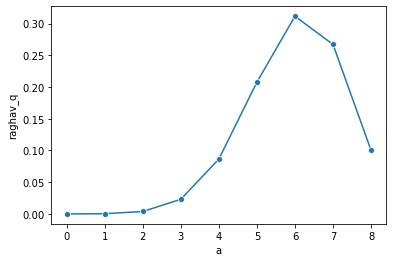

In [18]:
import seaborn as sns
sns.lineplot(x='a',y='raghav_q',data=df,marker='o')

<AxesSubplot:xlabel='a', ylabel='barkha_q'>

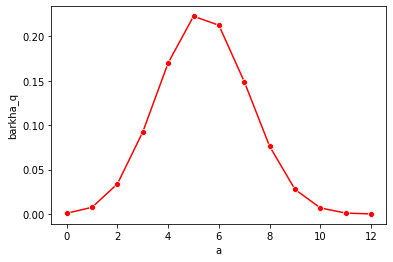

In [19]:

sns.lineplot(x='a',y='barkha_q',data=df1,marker='o',color='red')

# Q7

In [20]:
cust_rate=72/60
mu=4*cust_rate

In [21]:
from scipy.stats import poisson
print(f'The probability of arriving 5 cutomers in 4 minutes is : {poisson.pmf(k=5,mu=mu)}')
print(f'The probability of arriving not more than 3 customers in 4 minutes is : {poisson.pmf(k=3, mu=mu)}')
print(f'The Probability of more than 3 customers arriving in 4 minutes is : {1-poisson.cdf(k=3,mu=mu)}')

The probability of arriving 5 cutomers in 4 minutes is : 0.17474768364388296
The probability of arriving not more than 3 customers in 4 minutes is : 0.15169069760753714
The Probability of more than 3 customers arriving in 4 minutes is : 0.7057700835034357


Text(0, 0.5, 'Probability')

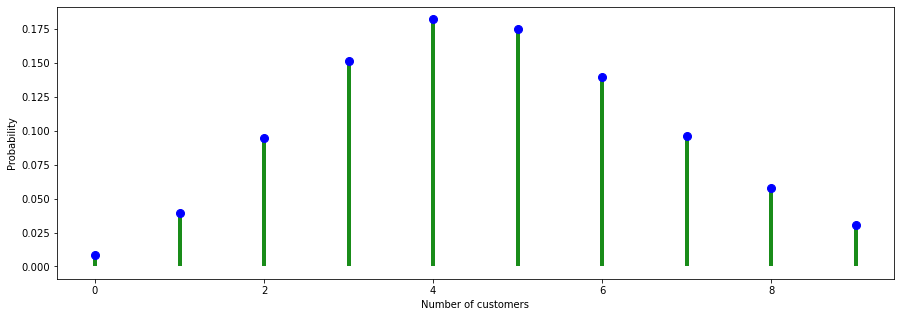

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
x = list(range(0,10))
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x, poisson.pmf(x,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='g', lw=4, alpha=0.9)
plt.xlabel('Number of customers')
plt.ylabel('Probability')

# Q8

In [23]:
mu_unit=(0.1)/77

The pobability of commiting 2 errors in 455 words financial report is :0.09669027375144444
The pobability of commiting 2 errors in 1000 words financial report is :0.23012815007300153
The pobability of commiting 2 errors in 255 words financial report is :0.039377135392854104


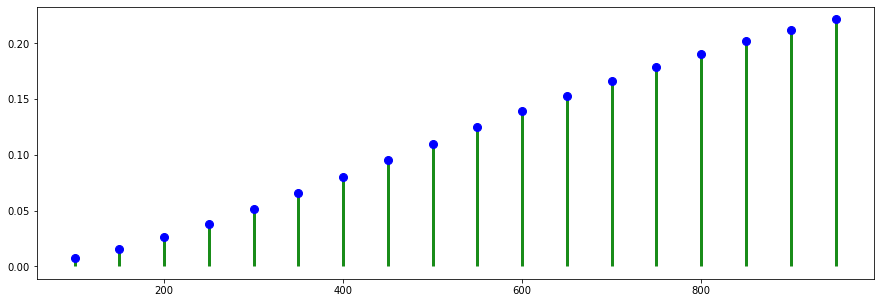

In [24]:
def mu(n):
    return n * mu_unit
print(f"The pobability of commiting 2 errors in 455 words financial report is :{poisson.pmf(2,mu=mu(455))}")
print(f"The pobability of commiting 2 errors in 1000 words financial report is :{poisson.pmf(2,mu=mu(1000))}")
print(f"The pobability of commiting 2 errors in 255 words financial report is :{poisson.pmf(2,mu=mu(255))}")
x=range(100,1000,50)
mu=[i*mu_unit for i in x]
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,poisson.pmf(2,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0, poisson.pmf(2,mu), colors='g', lw=3, alpha=0.9)

# Q9

In [25]:
f=lambda d:20*np.exp( (-20*(d-12.5)))
print(f'Probability if diameter>12.6 needs to be scraped:{integrate.quad(f,12.6,np.inf)[0]}')
print(f'CDF when diameter is 11mm:{integrate.quad(f,-np.inf,11)[0]}')

Probability if diameter>12.6 needs to be scraped:0.13533528323661398
CDF when diameter is 11mm:nan


C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
C:\Users\akshay goel\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  This is separate from the ipykernel package so we can avoid doing imports until


# Q10

In [36]:
from scipy.stats import norm
def P(z,b=np.inf) :
    return integrate.quad(norm.pdf,z,b)[0]

print('P(Z>1.26) = %.4f'%(P(1.26)))
print('P(Z<-0.86) = %.4f'%(1-P(-0.86)))
print('P(Z>-1.37) = %.4f'%(P(-1.37)))
print('P(−1.25 < Z < 0.37) = %.4f'%(1-P(0.37,b=-1.25)))
print('P(Z ≤ −4.6) = %.4f'%(1-P(-4.6)))
print('P(Z>z)=0.05 is %.2f'%(-1*norm.ppf(0.05)))
print('𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is %.2f'%(abs(norm.ppf(0.005))))

P(Z>1.26) = 0.1038
P(Z<-0.86) = 0.1949
P(Z>-1.37) = 0.9147
P(−1.25 < Z < 0.37) = 1.5387
P(Z ≤ −4.6) = 0.0000
P(Z>z)=0.05 is 1.64
𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is 2.58


# Q11

In [38]:
u=10
v=4
exceed=P((13-u)/np.sqrt(v))
print(f'Probability  that value of diameter exceeds 13 :{exceed}')
print(f'Probability that value of diameter is between 9 and 11 :{(P((9-u)/np.sqrt(v),(11-u)/np.sqrt(v)))}')
print(f'Current Measurement with probability 0.98: {np.sqrt(v)*norm.ppf(0.98)}')

Probability  that value of diameter exceeds 13 :0.06680720126885807
Probability that value of diameter is between 9 and 11 :0.3829249225480263
Current Measurement with probability 0.98: 4.107497821263645


# Q12

In [46]:
mean_dia=0.2508
std_dia=0.0005
def I(mean,std,a,b) :
    p=(a-mean)/std
    q=(b-mean)/std
    return (P(p,q))
print(f"Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:0.2508 is {I(0.2508,0.0005,0.2485,0.2515)}")
print(f"Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:0.2500 is {I(0.2500,0.0005,0.2485,0.2515)}")

Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:0.2508 is 0.9192412283115201
Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:0.2500 is 0.9973002039367398
